<a href="https://colab.research.google.com/github/shayoni-ui/QSP_LSTM/blob/main/QSP_LSTM_SIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload() # Upload Data

Saving test_AntipdL1.csv to test_AntipdL1.csv


In [ ]:
import io

data = pd.read_csv(io.BytesIO(uploaded['test_AntipdL1.csv']), header=None)
print(data.head())

   0         1         2         3         4         5         6         7    \
0    1  0.457606  0.021407  0.138050  0.326472  0.005488  0.014767  0.232032   
1    1  0.480725  0.084137  0.124571  0.228377  0.007109  0.022127  0.268831   
2    1  0.470297  0.118689  0.155686  0.348626  0.006961  0.019121  0.175678   
3    0  0.093709  0.214513  0.094954  0.263420  0.009751  0.011948  0.215812   
4    0  0.270394  0.078963  0.117239  0.341873  0.008773  0.014738  0.251955   

          8         9    ...     201     202     203     204     205     206  \
0  293.626025  1.473666  ...  4600.0  3810.0  3440.0  3180.0  2950.0  2750.0   
1  293.923864  1.241806  ...  4600.0  3810.0  3440.0  3180.0  2950.0  2750.0   
2  255.906913  0.773875  ...  4600.0  3810.0  3440.0  3180.0  2950.0  2750.0   
3  207.233769  1.324138  ...  4600.0  3810.0  3440.0  3180.0  2950.0  2750.0   
4  248.264701  0.871959  ...  4600.0  3810.0  3440.0  3180.0  2950.0  2750.0   

      207     208     209     210  
0 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
#data = pd.read_csv('drive/MyDrive/actual_data.csv'', header=None)
#print(data.head())
x_df, y_df, valid_df = np.array(data.iloc[:,0:11]), np.array(data.iloc[:,11:211]), np.array(data.iloc[:,-2:-1])
x_df = np.reshape(scaler.fit_transform(x_df), (4999, 11, 1))
#y_df = scaler.fit_transform(y_df)

print(x_df.shape, y_df.shape, valid_df.shape)

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.01, random_state=42)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(4999, 11, 1) (4999, 200) (4999, 1)
(3499, 11, 1) (1485, 11, 1) (15, 11, 1) (3499, 200) (1485, 200) (15, 200)


In [ ]:
# Build and train model
model = Sequential()
model.add(LSTM((128), batch_input_shape=(None, 11, 1), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM((200), return_sequences=False))
model.add(Dense(200))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 11, 128)           66560     
                                                                 
 lstm_4 (LSTM)               (None, 11, 32)            20608     
                                                                 
 lstm_5 (LSTM)               (None, 200)               186400    
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
Total params: 313,768
Trainable params: 313,768
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
110/110 - 11s - loss: 2858.9702 - val_loss: 2846.0415 - 11s/epoch - 96ms/step
Epoch 2/500
110/110 - 4s - loss: 2834.4927 - val_loss: 2822.7676 - 4s/epoch - 40ms/step
Ep

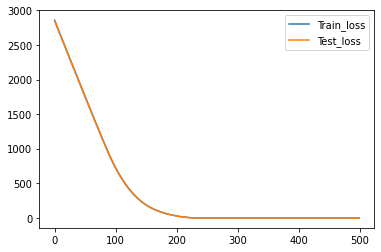

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(range(len(train_loss)), train_loss, label='Train_loss')
plt.plot(range(len(test_loss)), test_loss, label='Test_loss')
plt.legend()

In [ ]:
predictions = model.predict(X_val)
predictions.shape

(15, 200)

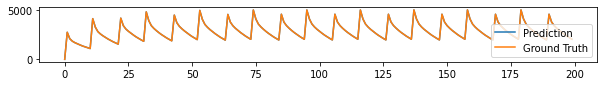

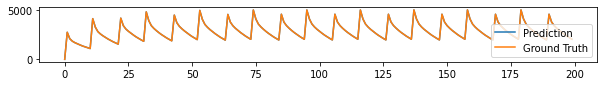

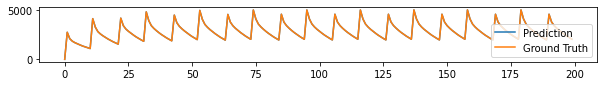

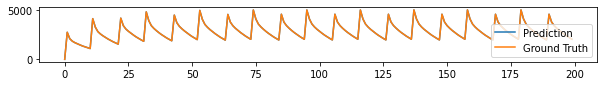

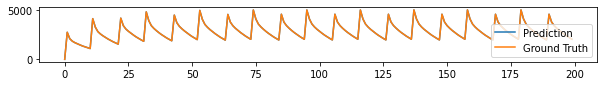

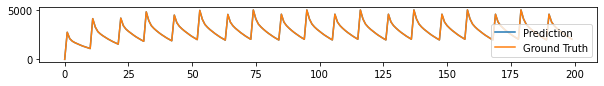

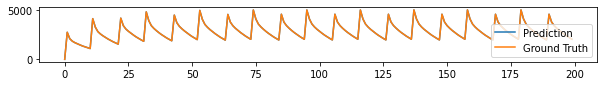

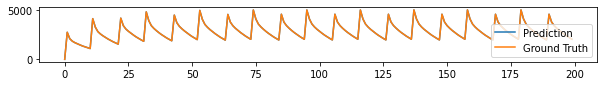

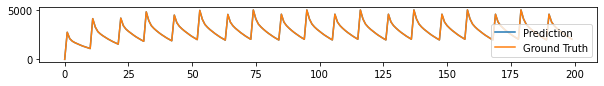

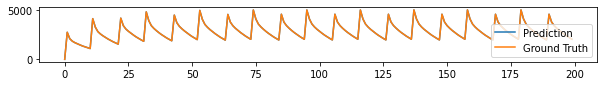

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import random

for i in random.sample(range(len(predictions)), 10):
  prediction, actual = predictions[i], y_val[i]
  #actual = y_val[i]
  fig, ax = plt.subplots(figsize=(10,1))
  ax.plot(range(len(prediction)), prediction, label='Prediction')
  ax.plot(range(len(actual)), actual, label='Ground Truth')
  plt.legend()